In [1]:
import pandas as pd
from ugvc.reports.report_utils import ReportUtils
from ugvc.reports.report_data_loader import ReportDataLoader
from IPython.display import display, Markdown

pd.options.display.float_format = '{:,.2%}'.format
pd.set_option('display.max_colwidth', None)

In [2]:
run_id = "Ultima 2023 germlien dataset"
pipeline_version = "1.5.0"
h5_concordance_file = "/proj/analysis/per_hil_f1/030945-NA24631-Z0024-CTGAGCCTGTCAGAT.comp.h5"
verbosity = 3
reference_version = "hg38"
truth_sample_name = "HG005"
h5outfile = "var_report.h5"    
exome_column_name = "exome.twist"
model_name = None
model_pkl = None

In [3]:
parameters = {
    'h5_concordance_file': h5_concordance_file,
    'run_id': run_id,
    'pipeline_version': str(pipeline_version),
    'verbosity': str(verbosity),
    'reference_version': reference_version,
    'truth_sample_name': truth_sample_name,
    'h5outfile': h5outfile,
    'model_pkl': model_pkl,
    'model_name': model_name
}

parameters = {name: parameters[name] for name in parameters if parameters[name] is not None}
param_names = list(parameters)

report_utils = ReportUtils(verbosity, h5outfile, score_name='qual')

if verbosity > 1:
    display(Markdown(f"# Variant Calling report {pipeline_version} (INTERNAL usage)"))
else:
    display(Markdown(f"# Variant Calling report {pipeline_version}"))

# Variant Calling report 1.5.0 (INTERNAL usage)

## 1. Input Parameters <a class="anchor" id="input_parameters"></a>

In [4]:
# load data
data_loader = ReportDataLoader(concordance_file=parameters['h5_concordance_file'],
                               reference_version=reference_version,
                              exome_column_name=exome_column_name)
data = data_loader.load_concordance_df()

In [5]:
if 'well_mapped_coverage' in data.columns:
    parameters['mean_var_depth'] = '{:.2f}'.format(data['well_mapped_coverage'].mean())
    param_names.append('mean_var_depth')

parameters_df = pd.DataFrame.from_dict(parameters, orient='index', columns=['value']).reindex(param_names)
parameters_df.to_hdf(h5outfile, key="parameters")
display(parameters_df)

,value
h5_concordance_file,/proj/analysis/per_hil_f1/030945-NA24631-Z0024-CTGAGCCTGTCAGAT.comp.h5
run_id,Ultima 2023 germlien dataset
pipeline_version,1.5.0
verbosity,3
reference_version,hg38
truth_sample_name,HG005
h5outfile,var_report.h5
mean_var_depth,38.77


In [6]:
anchor = report_utils.get_anchor("top")
display(Markdown(f"## Table of Contents {anchor}"))
tc = "* [Input Parameters](#input_parameters)\n"
tc += "* [All data](#all_data)\n"
if verbosity > 1:
    tc += "\t* [General accuracy](#gen_acc_all_data)\n"
    tc += "\t* [Error types](#err_types_all_data)\n"
    tc += "\t* [Stratified analysis](#all_data_bases)\n"
    tc += "\t* [Homozygous genotyping](#all_data_hom)\n"
tc += "* [UG high confidence regions](#ug_hcr)\n"
if verbosity > 1:
    tc += "\t* [General accuracy](#gen_acc_ug_hcr)\n"
    tc += "\t* [Error types](#err_types_ug_hcr)\n"
    tc += "\t* [Homozygous genotyping](#ug_hcr_hom)\n"

tc += "* [Exome](#exome)\n"
if verbosity > 1:
    tc += "\t* [General accuracy](#gen_acc_exome)\n"
    tc += "\t* [Error types](#err_types_exome)\n"
    tc += "\t* [Indel error examples](#exome_indel_errors)\n"
    tc += "\t* [snp errors examples](#exome_snp_errors)\n"


if verbosity > 2:
    tc += "* [Indel analysis](#indel_analysis)\n"
    tc += "\t* [All data](#all_data_indel_analysis)\n"
    tc += "\t* [UG HCR](#ug_hcr_indel_analysis)\n"
    tc += "\t* [Exome](#exome_indel_analysis)\n"
display(Markdown(tc))

## Table of Contents <a class ='anchor' id='top'> </a>

* [Input Parameters](#input_parameters)
* [All data](#all_data)
	* [General accuracy](#gen_acc_all_data)
	* [Error types](#err_types_all_data)
	* [Stratified analysis](#all_data_bases)
	* [Homozygous genotyping](#all_data_hom)
* [UG high confidence regions](#ug_hcr)
	* [General accuracy](#gen_acc_ug_hcr)
	* [Error types](#err_types_ug_hcr)
	* [Homozygous genotyping](#ug_hcr_hom)
* [Exome](#exome)
	* [General accuracy](#gen_acc_exome)
	* [Error types](#err_types_exome)
	* [Indel error examples](#exome_indel_errors)
	* [snp errors examples](#exome_snp_errors)
* [Indel analysis](#indel_analysis)
	* [All data](#all_data_indel_analysis)
	* [UG HCR](#ug_hcr_indel_analysis)
	* [Exome](#exome_indel_analysis)


## 2. Performance over all Data <a class="anchor" id="all_data"></a> 
The concordance between the variant calling results and the ground truth sample is presented below.
* Red line - precision and recall over different tree-scores.
* Red dot - precision and recall values for the chosen threshold.
* Black dot -precision and recall after filtering systematic errors (SEC)

[top](#top)

### General accuracy (all_data) <a class ='anchor' id='gen_acc_all_data'> </a>

* #pos - total variants in ground-truth
* neg - false-positive variants (before filtering)
* max_recall - fraction of true variants with correctly generated candidate

,# pos,# neg,fn,max recall,recall,precision,F1
hmer Indel 1,14244,148,201,99.16%,98.59%,98.97%,98.78%
hmer Indel 2,20796,165,320,99.13%,98.46%,99.20%,98.83%
hmer Indel 3,14273,135,233,99.24%,98.37%,99.06%,98.71%
hmer Indel 4,9880,82,172,99.04%,98.26%,99.18%,98.72%
hmer Indel 5,7937,85,148,99.12%,98.14%,98.92%,98.53%
hmer Indel 6,10321,88,179,99.15%,98.27%,99.16%,98.71%
hmer Indel 7,12715,114,193,99.64%,98.47%,99.11%,98.79%
hmer Indel 8,14239,152,246,99.77%,98.27%,98.93%,98.60%
hmer Indel 9,17507,226,340,99.82%,98.06%,98.70%,98.38%
hmer Indel 10,20254,358,766,99.79%,96.22%,98.20%,97.20%


### Error types (all_data) <a class ='anchor' id='err_types_all_data'> </a>

* noise - called variants which have no matching true variant
* wrong_allele - called variants which have a true variant in the same position with a non-matching allele
* hom->het - homozygous variants called as heterozygous
* het->hom - heterozygous variants called as homozygous
* miss - completely missed true variants


,noise,wrong_allele,hom->het,het->hom,filter_true,miss_candidate
hmer Indel 1,96,7,34,9,32,119
hmer Indel 2,102,6,40,17,77,181
hmer Indel 3,75,10,34,13,68,108
hmer Indel 9,90,39,44,53,173,31
hmer Indel 10,72,70,83,134,436,43
hmer Indel 11,72,93,70,227,737,10
hmer Indel 12,114,149,87,443,1257,8


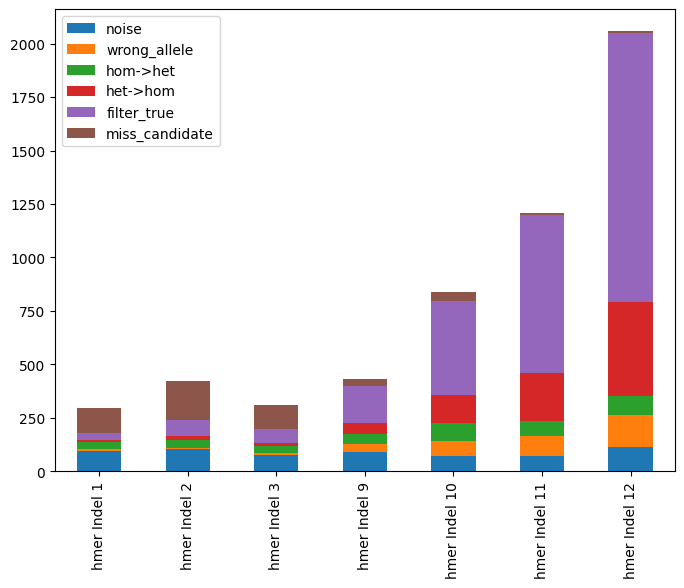

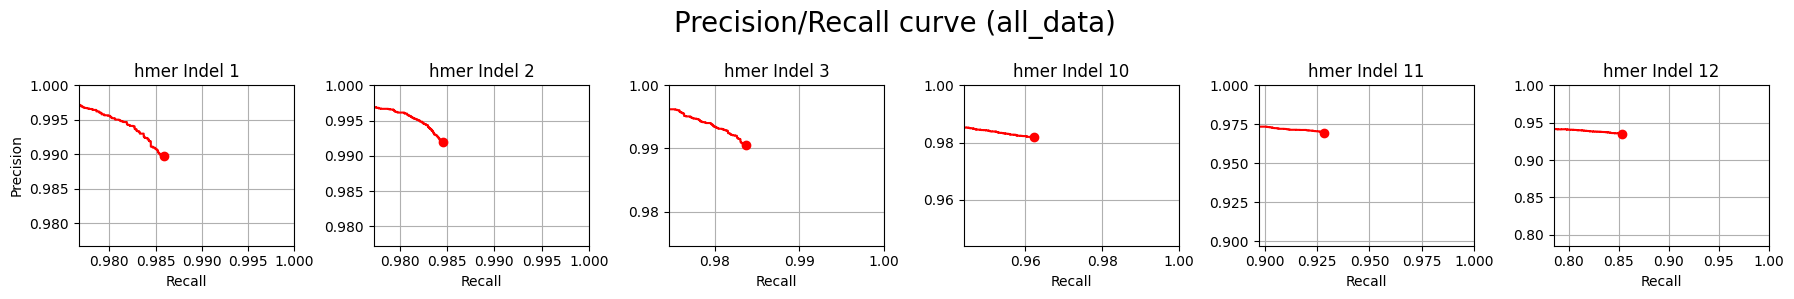

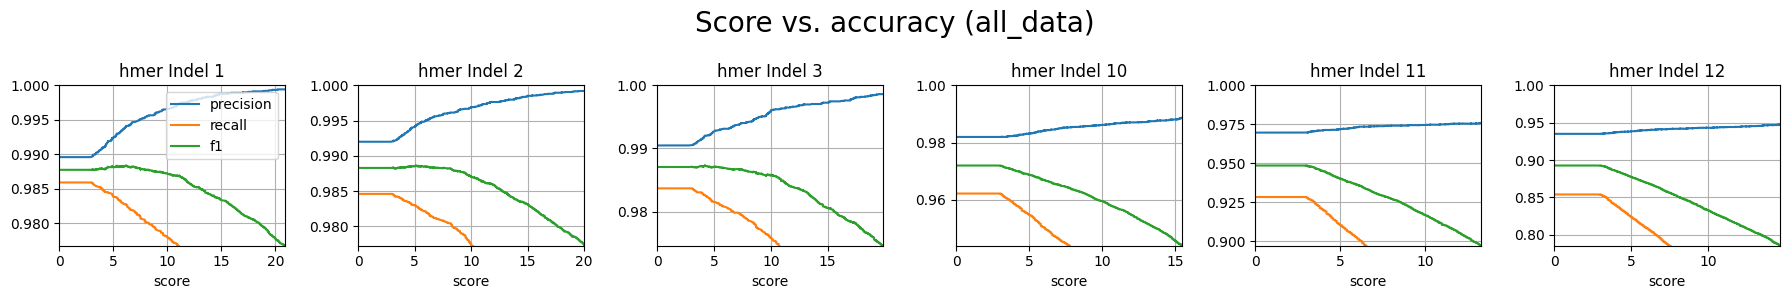

In [7]:
pd.options.display.float_format = '{:,.2%}'.format
if verbosity > 1:
      categories = ['hmer Indel 1', 'hmer Indel 2', 'hmer Indel 3',
              'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel 9', 
              'hmer Indel 10', 'hmer Indel 11', 'hmer Indel 12']
else:
    categories = ['SNP', 'Indel']

report_utils.basic_analysis(data, categories, 'all_data', 'sec_data')

## 2.1 Stratified by base <a class ='anchor' id='all_data_bases'> </a>

#### (A,T)

,# pos,# neg,fn,max recall,recall,precision,F1
SNP (A/T),1579495,2076,17828,98.94%,98.87%,99.87%,99.37%
Indel (A/T),167540,19963,12427,97.23%,92.58%,88.60%,90.55%
hmer Indel <=4 (A/T),36288,436,549,98.78%,98.49%,98.79%,98.64%
"hmer Indel >4,<=8 (A/T)",38043,527,478,99.10%,98.74%,98.62%,98.68%
"hmer Indel >8,<=10 (A/T)",36435,1604,1292,98.39%,96.45%,95.64%,96.04%
"hmer Indel >10,<=12 (A/T)",28716,9380,2933,97.69%,89.79%,73.32%,80.72%
"hmer Indel >12,<=14 (A/T)",18011,4706,3970,91.43%,77.96%,74.90%,76.40%
"hmer Indel >15,<=19 (A/T)",9574,3185,3059,89.16%,68.05%,67.16%,67.60%
hmer Indel >=20 (A/T),473,125,146,95.35%,69.13%,72.35%,70.70%


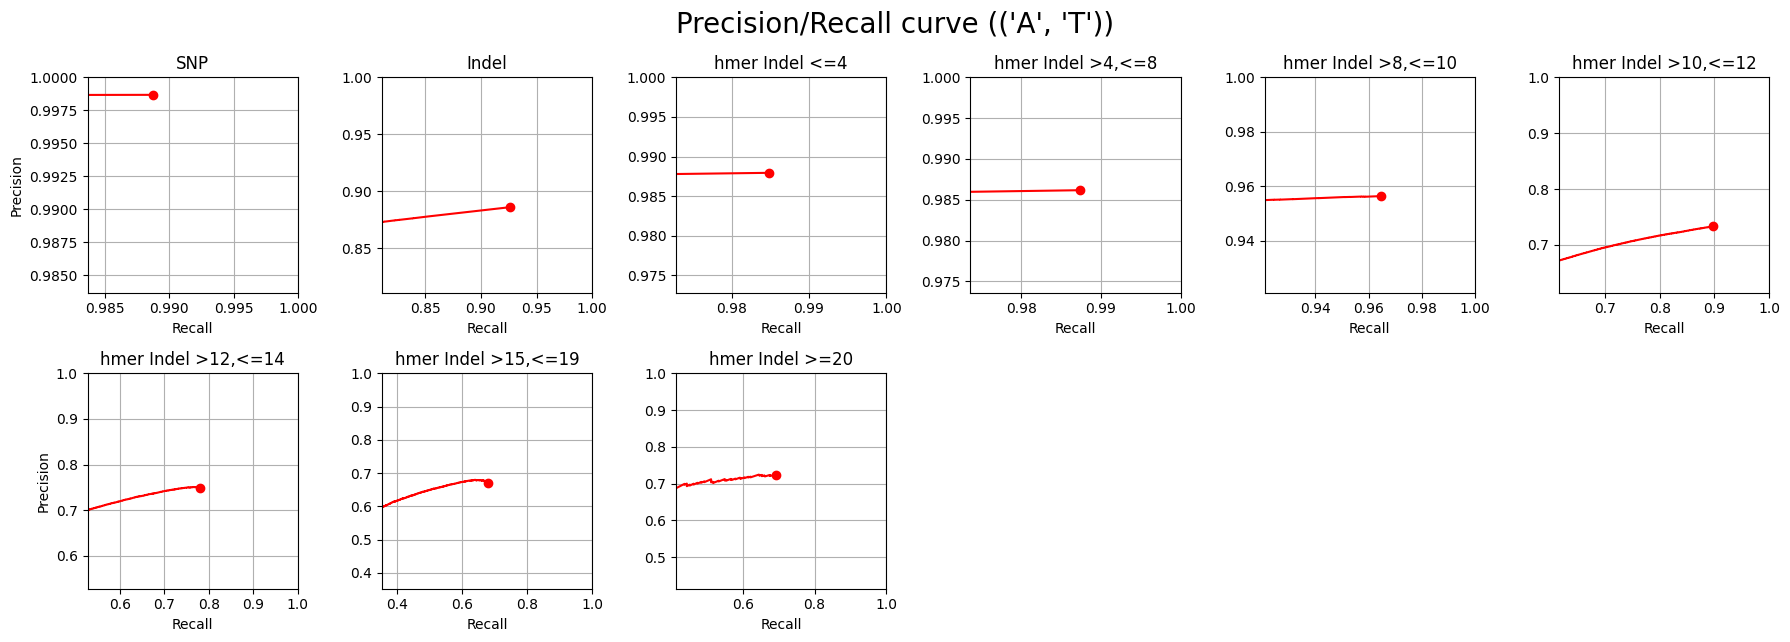

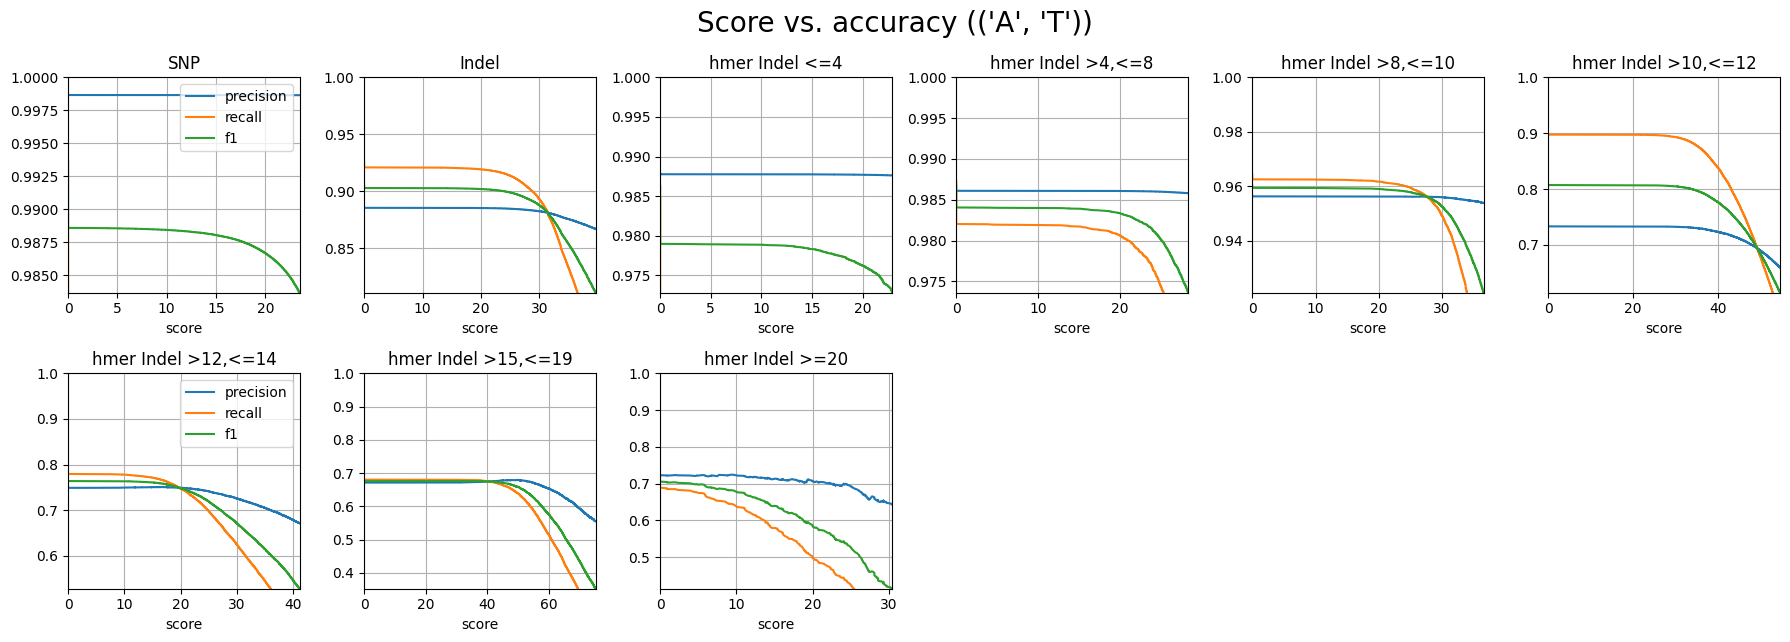

In [8]:
if verbosity > 1:
    anchor = report_utils.get_anchor('all_data_bases')
    display(Markdown(f"## 2.1 Stratified by base {anchor}"))
    display(Markdown(f"#### (A,T)"))
    categories = ['SNP', 'Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10',
                  'hmer Indel >10,<=12', 'hmer Indel >12,<=14', 'hmer Indel >15,<=19', 'hmer Indel >=20']
    at_df = report_utils.base_stratification_analysis(data, categories, ('A', 'T'))

#### (G,C)

,# pos,# neg,fn,max recall,recall,precision,F1
SNP (G/C),1696006,2363,19859,98.91%,98.83%,99.86%,99.34%
Indel (G/C),31796,804,892,98.06%,97.19%,97.46%,97.33%
hmer Indel <=4 (G/C),22871,298,378,98.53%,98.35%,98.69%,98.52%
"hmer Indel >4,<=8 (G/C)",7172,224,268,97.16%,96.26%,96.86%,96.56%
"hmer Indel >8,<=10 (G/C)",1320,193,159,95.45%,87.95%,85.75%,86.84%


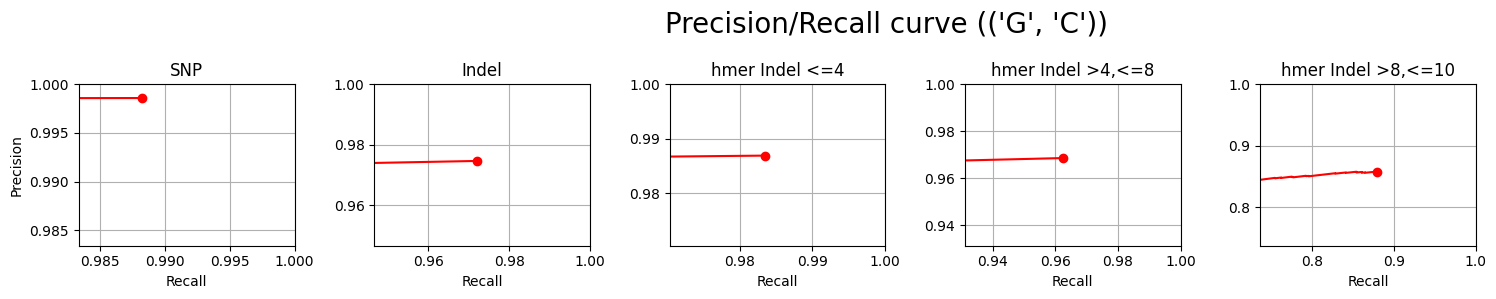

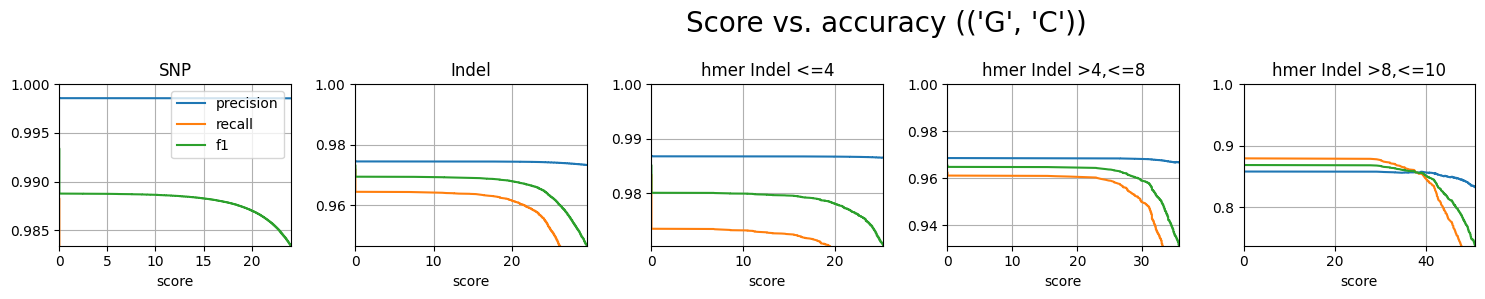

In [9]:
if verbosity > 1:
    display(Markdown(f"#### (G,C)"))
    categories = ['SNP', 'Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10']
    gc_df = report_utils.base_stratification_analysis(data, categories,('G', 'C')) 
    
    base_strat_df = pd.concat([at_df, gc_df])
    report_utils.make_multi_index(base_strat_df)
    base_strat_df.to_hdf(h5outfile, key="all_data_per_base")

In [10]:
if verbosity > 1:
    anchor = report_utils.get_anchor('all_data_hom')
    display(Markdown(f"### 2.2 Homozygous genotyping accuracy {anchor}"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classified as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 
                  'hmer Indel >8,<=10', 'hmer Indel >10,<=12', 'hmer Indel >12,<=14', 'hmer Indel >15,<=19', 'hmer Indel >=20']
    report_utils.homozygous_genotyping_analysis(data, categories, "all_data_homozygous")

### 2.2 Homozygous genotyping accuracy <a class ='anchor' id='all_data_hom'> </a>

The precision and recall of called homozygous variants (where the variant was not classified as False Negative)

KeyboardInterrupt: 

## 3. Performance over UG high confidence regions <a class="anchor" id="ug_hcr"></a>

Variant calling peformance exclusing genomic areas where UG performance is poor, i.e:
- Homopolymers - runs of length 11 bp and above, padded with four bases around the genomic coordinates,
- AT-rich regions - bases where the GC content of the surrounding 40 bases is lower than 5%,
- Tandem repeats,
- Low mapping quality - regions that are covered by at least 20 reads, but less than 10% of these reads are aligned with mapping quality > 20,
- High coverage variability - regions with coverage that is highly variable between samples (std/mean > 0.5)

[top](#top)

### General accuracy (ug_hcr) <a class ='anchor' id='gen_acc_ug_hcr'> </a>

* #pos - total variants in ground-truth
* neg - false-positive variants (before filtering)
* max_recall - fraction of true variants with correctly generated candidate

,# pos,# neg,fn,max recall,recall,precision,F1
hmer Indel 1,13780,84,79,99.80%,99.43%,99.41%,99.42%
hmer Indel 2,20238,105,118,99.86%,99.41%,99.48%,99.45%
hmer Indel 3,13828,99,105,99.87%,99.24%,99.30%,99.27%
hmer Indel 4,9571,62,87,99.75%,99.09%,99.37%,99.23%
hmer Indel 5,7686,65,67,99.87%,99.13%,99.15%,99.14%
hmer Indel 6,10025,72,95,99.79%,99.05%,99.30%,99.18%
hmer Indel 7,12353,104,134,99.96%,98.91%,99.17%,99.04%
hmer Indel 8,13848,130,195,99.91%,98.59%,99.06%,98.83%
hmer Indel 9,17049,207,287,99.93%,98.32%,98.78%,98.55%
hmer Indel 10,19639,327,685,99.90%,96.51%,98.30%,97.40%


### Error types (ug_hcr) <a class ='anchor' id='err_types_ug_hcr'> </a>

* noise - called variants which have no matching true variant
* wrong_allele - called variants which have a true variant in the same position with a non-matching allele
* hom->het - homozygous variants called as heterozygous
* het->hom - heterozygous variants called as homozygous
* miss - completely missed true variants


,noise,wrong_allele,hom->het,het->hom,filter_true,miss_candidate
hmer Indel 1,61,0,15,6,30,28
hmer Indel 2,70,3,20,13,54,29
hmer Indel 3,56,7,25,8,47,18
hmer Indel 9,82,33,42,50,150,12
hmer Indel 10,68,59,74,127,406,19
hmer Indel 11,0,0,0,0,0,0
hmer Indel 12,0,0,0,0,0,0


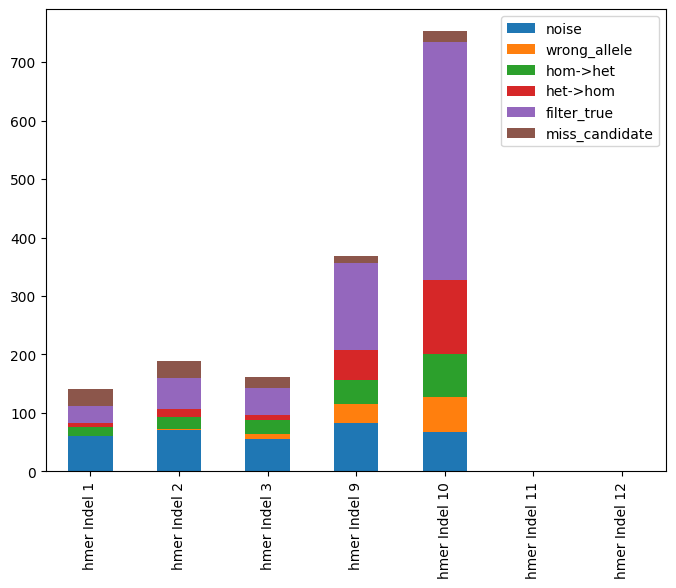

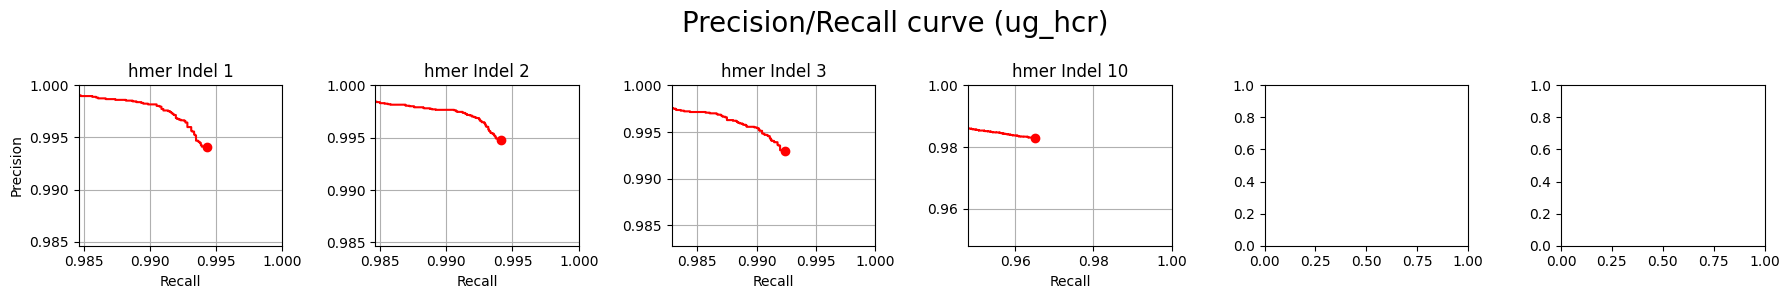

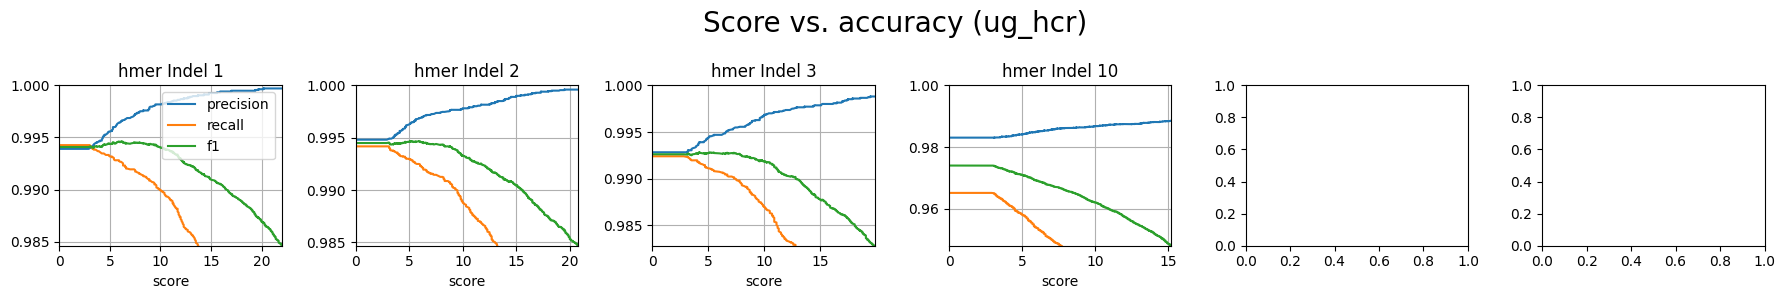

In [8]:
pd.options.display.float_format = '{:,.2%}'.format
ug_hcr_data = data.query("ug_hcr==True").copy()

if verbosity > 1:
    categories = ['hmer Indel 1', 'hmer Indel 2', 'hmer Indel 3',
              'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel 9', 
              'hmer Indel 10', 'hmer Indel 11', 'hmer Indel 12']
    
else:
    categories = ['SNP', 'Indel']
    
report_utils.basic_analysis(ug_hcr_data, categories, 'ug_hcr', 'ug_hcr_sec_data')

In [ ]:
if verbosity > 1:
    anchor = report_utils.get_anchor('ug_hcr_hom')
    display(Markdown(f"### 3.1 Homozygous genotyping accuracy {anchor}"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classified as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10']
    report_utils.homozygous_genotyping_analysis(ug_hcr_data, categories, "ug_hcr_homozygous")

## 4. Performance over exome <a class="anchor" id="exome"></a>
Performance over exome regions (defined in exome_column_name)

[top](#top)

In [ ]:
exome_data = data[data[exome_column_name]].copy()

if verbosity > 1:
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'hmer Indel <=4', 'hmer Indel >4,<=8', 'hmer Indel >8,<=10']
else:
    categories = ['SNP', 'Indel']
    
report_utils.basic_analysis(exome_data, categories, 'exome', 'exome_sec_data')


In [ ]:
if verbosity > 1:
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:.2f}'.format
    anchor = report_utils.get_anchor('exome_indel_errors')
    present_columns = [x for x in ['alleles',  'call', 'base', 'gt_ultima', 'gt_ground_truth', 'ad',
                                    'max_vaf', 'ug_hcr', 'mappability.0', 'hmer_length'] if x in exome_data.columns]
    indel_errors = exome_data['indel'] & ((exome_data['fp'] & (exome_data['filter'] == 'PASS')) | exome_data['fn'])
    hmer_indel_errors = indel_errors & (exome_data['hmer_length'] > 0)
    non_hmer_indel_errors = indel_errors & (exome_data['hmer_length'] == 0)
    display(Markdown(f'### Hmer INDEL Errors: {anchor}'))
    display(exome_data[hmer_indel_errors][present_columns])
    display(Markdown(f'### Non-hmer INDEL Errors: {anchor}'))
    display(exome_data[non_hmer_indel_errors][present_columns])
    anchor = report_utils.get_anchor('exome_snp_errors')
    display(Markdown(f'### SNP Errors: {anchor}'))
    display(exome_data[~exome_data['tp'] & ~exome_data['indel'] & (exome_data['filter'] == 'PASS')][present_columns].head(20))

In [ ]:
d = data
if 'well_mapped_coverage' in d.columns and 'mappability.0' in d.columns and verbosity > 1:
    anchor = report_utils.get_anchor('well_mapped_coverage')
    display(Markdown(f"## 5. Performance over regions with coverage>=20 and excluding areas with mappability {anchor}"))    
    good_cov_data = d[(d['well_mapped_coverage'] >= 20) & (d['mappability.0'])].copy()
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8',
                  'hmer Indel 4', 'hmer Indel 5', 'hmer Indel 6', 'hmer Indel 7', 'hmer Indel 8', 'hmer Indel >8,<=10']
    df = report_utils.basic_analysis(good_cov_data, categories, 'good_cvg_data')
    
    display(Markdown(f"### 4.1 Homozygous genotyping accuracy"))
    display(Markdown(f"The precision and recall of called homozygous variants (where the variant was not classfied as False Negative)"))
    categories = ['SNP', 'Indel', 'non-hmer Indel', 'non-hmer Indel w/o LCR', 'hmer Indel <=4', 'hmer Indel >4,<=8']
    report_utils.homozygous_genotyping_analysis(good_cov_data, categories, "good_cvg_data_homozygous")

In [ ]:
if verbosity > 2:
    anchor = report_utils.get_anchor('indel_analysis')
    display(Markdown(f"## 5. Indel analysis\n {anchor}"
    "For each factor, show the following histograms\n"
    "* Number of false positive variants per bin\n"
    "* Number of true positive variants per bin\n"
    "* Number of false negative variants per bin\n"
    "* precision per bin (as line plot)\n"
    "* recall per bin (as lint plot)\n\n"
    "Notes:\n"
    "* Insertions / Deletions are displayed separately (two colors)\n"
    "* homopolymer deletions and non-homopolymer deletions are displayed separately (separate plots)\n\n"
    "[top](#top)"))
    anchor = report_utils.get_anchor('all_data_indel_analysis')
    display(Markdown(f"### 5.1 All data {anchor}"))
    report_utils.indel_analysis(data, 'wg')
    anchor = report_utils.get_anchor('ug_hcr_indel_analysis')
    display(Markdown(f"### 5.2 UG-HCR {anchor}"))
    report_utils.indel_analysis(ug_hcr_data, 'ug-hcr')
    anchor = report_utils.get_anchor('exome_indel_analysis')
    display(Markdown(f"### 5.3 exome {anchor}"))
    report_utils.indel_analysis(exome_data, 'exome')